In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys, gzip, csv
from glob import glob

import numpy as np
import collections

import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import pandas as pd

In [2]:
models = [
    ["Henry VII","../models/eebo-henry_VII-drift.csv.gz"],
    ["Edward VI","../models/eebo-edward_VI-drift.csv.gz"],
    ["Mary I","../models/eebo-mary_I-drift.csv.gz"],
    ["Elizabeth I","../models/eebo-elizabeth_I-drift.csv.gz"],
    ["James I","../models/eebo-james_I-drift.csv.gz"],
    ["Charles I","../models/eebo-charles_I-drift.csv.gz"],
    ["Oliver Cromwell","../models/eebo-oliver_cromwell-drift.csv.gz"],
    ["Charles I","../models/eebo-charles_II-drift.csv.gz"], 
]
    
drift_data = list()
for model_name, file in models:
    print("starting {0}".format(model_name))
    input_data = dict()
    row_count = 0
    with gzip.open(file, 'rt') as csvfile:    
        reader = csv.reader(csvfile)
        for row in reader:
            val = float(row[1].replace('[[','').replace(']]',''))
        
            # convert to angular distance for values from 0 - 1
            val = np.arccos(val) / np.pi
            input_data[row[0]] = val
            row_count += 1

    drift_data.append([model_name,input_data])

starting Henry VII
starting Edward VI
starting Mary I
starting Elizabeth I
starting James I
starting Charles I
starting Oliver Cromwell
starting Charles I


In [3]:
unique_terms = set().union(*(m[1].keys() for m in drift_data))

In [17]:
# basic stats
vocab = list()
model_names = [x[0] for x in drift_data]
mc = len(model_names)
rows = list()

for word in unique_terms:
    row = list()
    for model, data in drift_data:
        if word in data.keys():
            row.append(data[word])
        else:
            row.append(0)
    # if we have all the words
    if len(row) == mc:
        vocab.append(word)
        rows.append(row)

In [5]:
# display words with greatest change over time
#for idx in np.argsort([statistics.stdev(x) for x in rows])[:-25 - 1:-1]:
#    print(vocab[idx],statistics.stdev(rows[idx]))

In [6]:
#statistics.stdev(get_values("church"))

In [7]:
# display words with least change over time
#for idx in np.argsort(([np.mean(x) for x in rows]))[:50]:
    # which are present in at least three periods?  
#    print(vocab[idx],np.mean(rows[idx]))

In [8]:
def get_mean(word):
    idx = vocab.index(word)
    return(np.mean(rows[idx]))

def get_values(word):
    idx = vocab.index(word)
    return(rows[idx])

def plt_change_over_time(word):
    idx = vocab.index(word)
    vals = rows[idx]
    fig = plt.figure(figsize=(20, 15))
    plt.ylim(0,1)
    plt.xticks(np.arange(len(model_names)),model_names)    
    plt.plot(vals)
    plt.show()

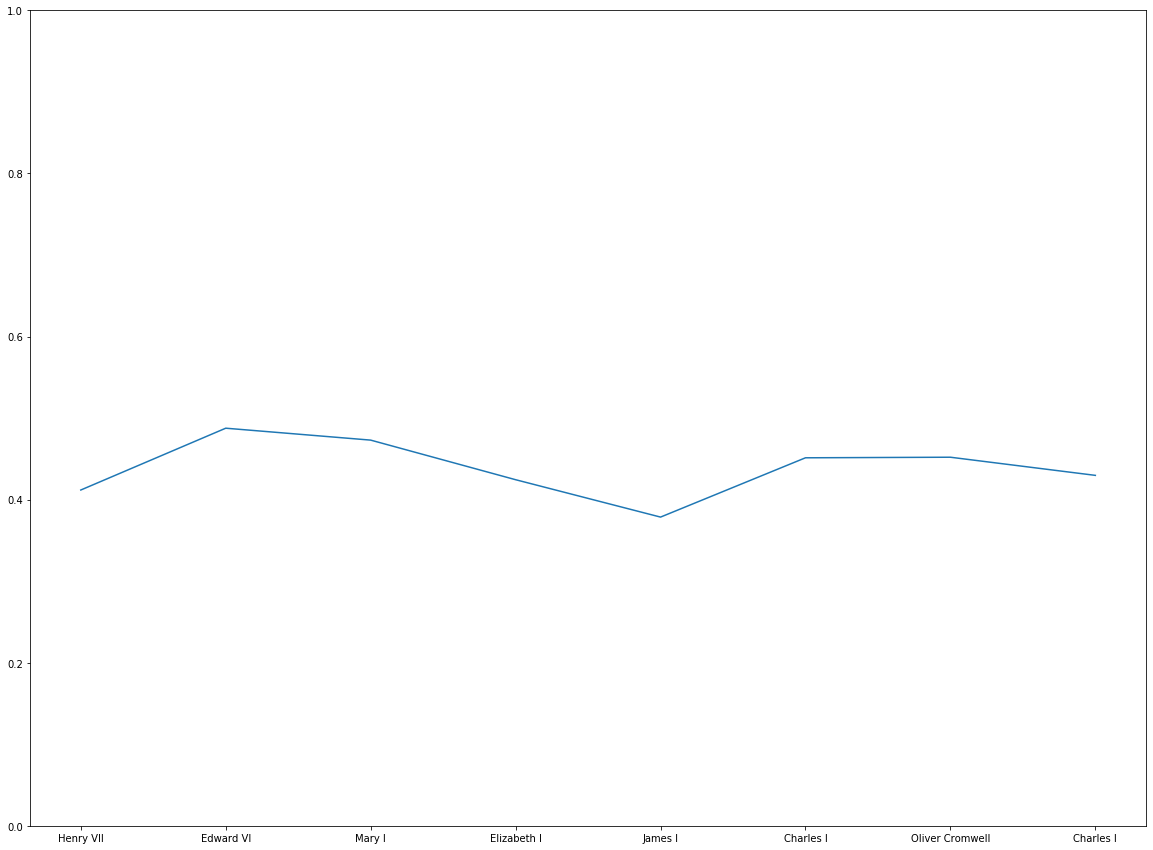

In [9]:
plt_change_over_time("fate")

In [18]:
# display raw counts for period of max change 
# and percents

change_chart = pd.DataFrame(rows, index=vocab, columns=model_names)
values=dict()

for x in range(len(model_names)):
    values[x] = 0
for x in np.argmax(change_chart.values, axis=1):
    values[x] += 1

print("Term Change By Period:")
for v in values.keys():
    print("{:<20} {:>1}% ({:2})".format(model_names[v],
                                       np.round((values[v]/change_chart.shape[0]*100),2),
                                       values[v]))

Term Change By Period:
Henry VII            6.83% (64437)
Edward VI            3.96% (37389)
Mary I               1.65% (15582)
Elizabeth I          1.55% (14663)
James I              30.46% (287338)
Charles I            17.24% (162600)
Oliver Cromwell      21.11% (199109)
Charles I            17.19% (162109)


In [19]:
np.mean(change_chart.values, axis=0)

array([0.07242867, 0.03977888, 0.02822364, 0.02449414, 0.24238021,
       0.17640468, 0.19303782, 0.16287635])

In [11]:
change_chart['Most Significant Change'] = np.argmax(change_chart.values, axis=1)
change_chart

,Henry VII,Edward VI,Mary I,Elizabeth I,James I,Charles I,Oliver Cromwell,Charles I,Most Significant Change
re-suruay,0.000000,0.000000,0.0,0.0,0.000000,0.493099,0.000000,0.000000,5
heart-wounding,0.000000,0.000000,0.0,0.0,0.000000,0.491948,0.479584,0.000000,5
fiå¿ter,0.000000,0.000000,0.0,0.0,0.347302,0.000000,0.485048,0.000000,6
appetatur,0.000000,0.000000,0.0,0.0,0.000000,0.545038,0.000000,0.000000,5
fenyte,0.000000,0.518397,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
dispraises,0.411759,0.000000,0.0,0.0,0.451763,0.407190,0.477076,0.425312,6
rij,0.392549,0.363666,0.0,0.0,0.356174,0.324083,0.278977,0.314921,0
nippi,0.000000,0.000000,0.0,0.0,0.499244,0.000000,0.000000,0.000000,4
signement,0.000000,0.000000,0.0,0.0,0.510182,0.458996,0.466724,0.000000,4


In [14]:
# now special terms of interest
words_of_interest = ["religion","elect","election",
                     "church","churche","trinity","jesus","individual",
                     "predestination","predestinate","chosen","soul","redemption","faith",
                     "fate","self","self","sacrement","authority"]

words = list()
model_names = [x[0] for x in drift_data]
rows = list()

for word in words_of_interest:
    words.append(word)
    row = list()
    for model, data in drift_data:
        if word in data.keys():
            row.append(data[word])
        else:
            row.append(0)
        
    rows.append(row)
    
# display raw counts for period of max change 
# and percents for terms of interest

change_chart = pd.DataFrame(rows, index=words, columns=model_names)
values=dict()

for x in range(len(model_names)):
    values[x] = 0
for x in np.argmax(change_chart.values, axis=1):
    values[x] += 1

print("Term Change By Period:")
for v in values.keys():
    print("{:<20} {:>1}% ({:2})".format(model_names[v],
                                       np.round((values[v]/change_chart.shape[0]*100),2),
                                       values[v]))
    

Term Change By Period:
Henry VII            26.32% ( 5)
Edward VI            21.05% ( 4)
Mary I               10.53% ( 2)
Elizabeth I          21.05% ( 4)
James I              5.26% ( 1)
Charles I            5.26% ( 1)
Oliver Cromwell      10.53% ( 2)
Charles I            0.0% ( 0)


In [15]:
import pandas as pd
change_chart['Most Significant Change'] = np.argmax(change_chart.values, axis=1)
change_chart

,Henry VII,Edward VI,Mary I,Elizabeth I,James I,Charles I,Oliver Cromwell,Charles I,Most Significant Change
religion,0.485928,0.427620,0.480635,0.492312,0.423761,0.460933,0.432179,0.436407,3
elect,0.513440,0.412454,0.423738,0.440738,0.393366,0.452442,0.444851,0.437671,0
election,0.463887,0.418095,0.406874,0.458536,0.399385,0.482087,0.386017,0.432343,5
church,0.472015,0.408049,0.490675,0.499283,0.436581,0.457916,0.434090,0.468864,3
churche,0.470898,0.369270,0.530207,0.485644,0.449729,0.436721,0.458720,0.436746,2
trinity,0.000000,0.000000,0.000000,0.000000,0.413923,0.433499,0.482922,0.431517,6
jesus,0.480210,0.000000,0.466919,0.442167,0.447323,0.404109,0.452802,0.414670,0
individual,0.000000,0.000000,0.000000,0.000000,0.558335,0.529295,0.392629,0.401012,4
predestination,0.503360,0.000000,0.000000,0.433598,0.410778,0.453339,0.440364,0.447701,0
predestinate,0.466441,0.000000,0.451715,0.471085,0.443935,0.355828,0.446045,0.404700,3
